In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
register_matplotlib_converters()
from time import time
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [13]:
df_ice_cream = pd.read_csv("ice_cream.csv")
df = df.copy()
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [15]:
df_ice_cream = df_ice_cream.rename(columns = {'DATE':'date','IPN31152N':'production'})

In [17]:
df_ice_cream['date'] = pd.to_datetime(df_ice_cream.date)

In [19]:
df_ice_cream.set_index('date',inplace=True)

In [21]:
start_date = pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream[df_ice_cream.index >= start_date]

In [23]:
df_ice_cream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


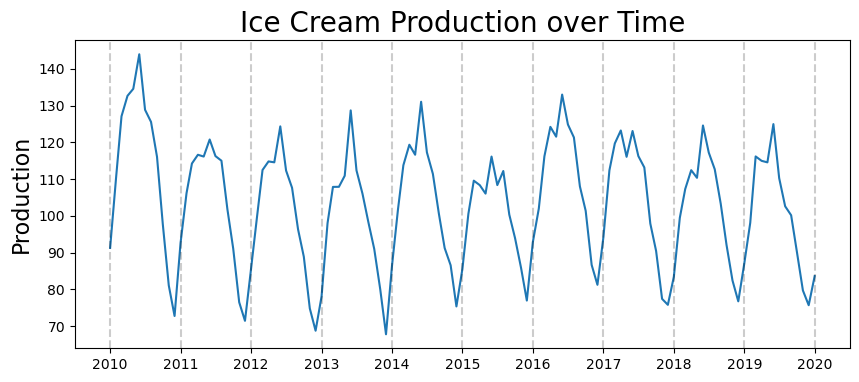

In [25]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2010,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

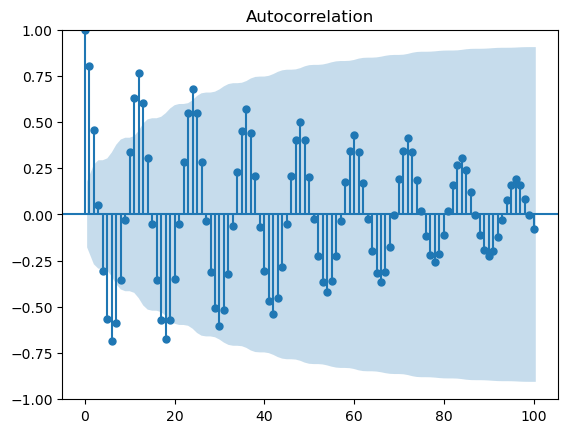

In [27]:
acf_plot = plot_acf(df_ice_cream.production,lags=100)

In [29]:
train_end = datetime(2018,12,1)
test_end = datetime(2019,12,1)

train_data = df_ice_cream.production[:train_end]
test_data = df_ice_cream.production[train_end + timedelta(days=1):test_end]

In [31]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order=(3,0,0))

C:\Users\LEGION\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LEGION\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LEGION\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [33]:
start = time()
model_fit = model.fit()
end = time()
print('Model fitting time:',end-start)

Model fitting time: 0.16944384574890137


In [35]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             production   No. Observations:                  108
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -374.085
Date:                Wed, 04 Sep 2024   AIC                            758.170
Time:                        20:40:56   BIC                            771.580
Sample:                    01-01-2010   HQIC                           763.607
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.5743      2.169     47.761      0.000      99.324     107.825
ar.L1          1.0469      0.102     10.256      0.000       0.847       1.247
ar.L2         -0.0523      0.175     -0.298      0.7

In [37]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

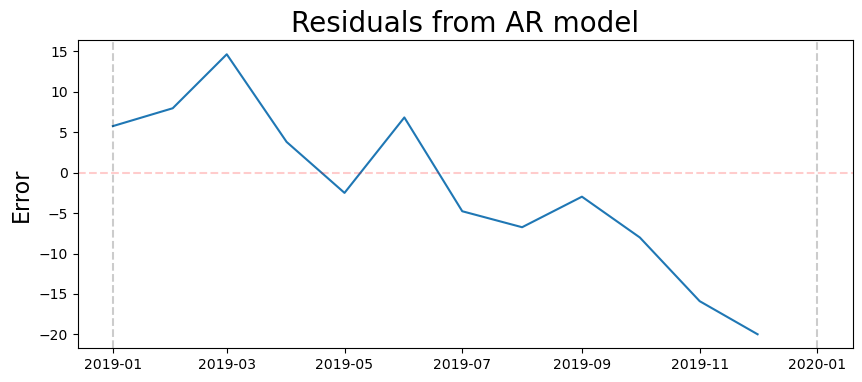

In [41]:
predictions = model_fit.predict(start=pred_start_date, end = pred_end_date)
residuals = test_data - predictions


plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR model',fontsize=20)
plt.ylabel('Error',fontsize=16)
plt.axhline(0,color='r',linestyle='--',alpha=0.2)
for year in range(2019,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),color='k',linestyle='--',alpha=0.2)

Text(0, 0.5, 'Production')

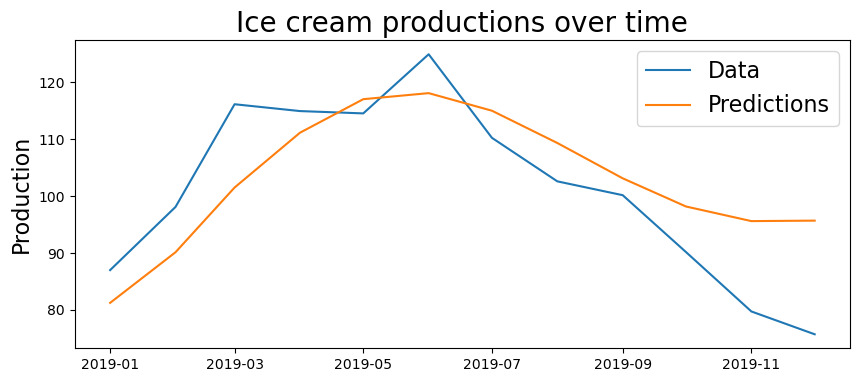

In [43]:
plt.figure(figsize=(10,4))
plt.plot(test_data)
plt.plot(predictions)
plt.legend(('Data','Predictions'),fontsize=16)
plt.title('Ice cream productions over time',fontsize=20)
plt.ylabel('Production',fontsize=16)

In [45]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))
print('Root mean squared error:', np.sqrt(np.mean(residuals**2)))

Mean Absolute Percent Error: 0.0895
Root mean squared error: 9.88415874704018
